In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

from neo4jtools import *

query = """
MATCH (h:HOMME)-[e:EXERCE]->(a:ACTIVITÉ {nom:'Agent de change'}), (h)-[:NAISSANCE]->(l)
WHERE (e.date_début.year >= 1815 AND e.date_début.year <= 1852)
OR (e.date_fin.year >= 1815 AND e.date_fin.year <= 1852)
RETURN h, l.adresse_actuelle, l.latitude, l.longitude, e.date_début, e.date_fin
"""

data = get_neo4j_results_of(query)

# Extraire les informations pertinentes
rows = []
for entry in data:
    nom = entry['h']['nom']
    date_naissance = entry['h'].get('date_naissance', None)
    date_debut = entry['e.date_début']
    date_fin = entry['e.date_fin']
    adresse = entry['l.adresse_actuelle']
    latitude = entry['l.latitude']
    longitude = entry['l.longitude']

    rows.append([nom, date_naissance, date_debut, date_fin, adresse, latitude, longitude])

df = pd.DataFrame(rows, columns=['nom', 'date_naissance', 'date_debut', 'date_fin', 'adresse', 'latitude', 'longitude'])
df.to_csv("villes_naissance.csv")

# Agréger les données pour compter le nombre de personnes par emplacement
aggregated_df = df.groupby(['latitude', 'longitude']).size().reset_index(name='counts')

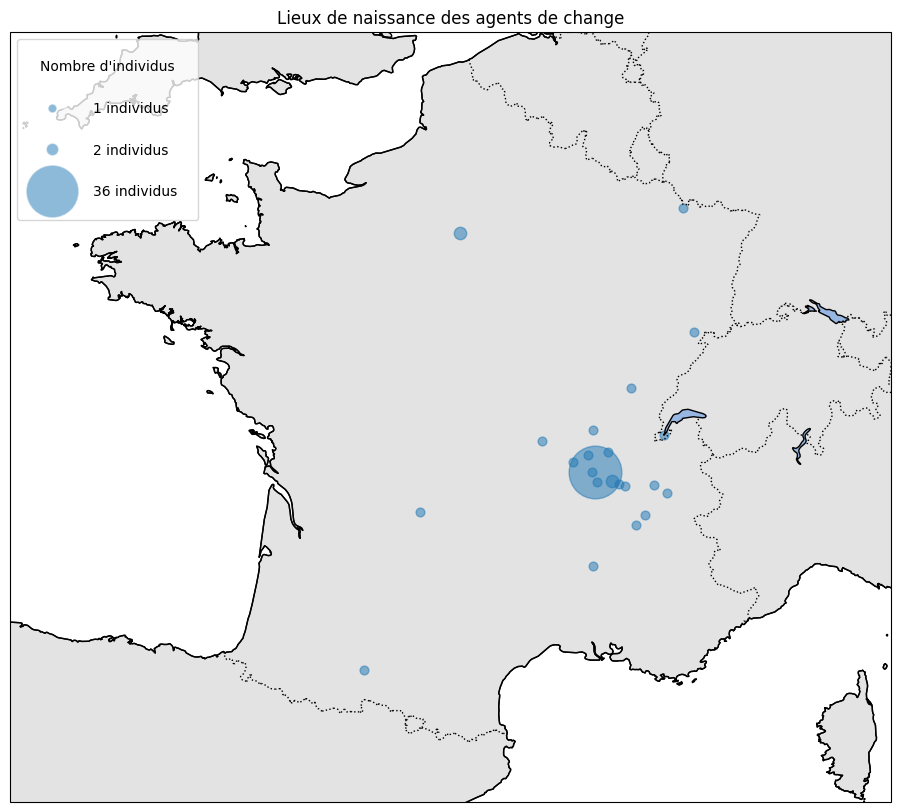

In [2]:
land_color = "#e3e3e3"
point_color = "tab:blue"

# Redéfinir la projection
projection = ccrs.LambertConformal(central_longitude=2.5, central_latitude=46.5, standard_parallels=(44, 49))

# Redéfinir la taille des points pour la légende
legend_sizes = [1, 2, aggregated_df['counts'].max()]
legend_labels = [f"{size} individus" for size in legend_sizes]
legend_handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=point_color, alpha=0.5,
                             markersize=((size*40)**0.5)) for size in legend_sizes]

# Recréer la carte avec la légende ajustée
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})
ax.set_extent([-5.3, 9.7, 41.3, 51.2])

# Ajoutez les caractéristiques géographiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor=land_color)
ax.add_feature(cfeature.LAKES, edgecolor='black')

# Placer les points sur la carte avec une taille proportionnelle au nombre de personnes
for index, row in aggregated_df.iterrows():
    ax.scatter(row["longitude"], row["latitude"], s=row["counts"]*40, color=point_color, alpha=0.5, transform=ccrs.PlateCarree())

# Ajouter la légende ajustée
ax.legend(handles=legend_handles, labels=legend_labels, title="Nombre d'individus", loc="upper left", borderpad=1.5, labelspacing=2, handletextpad=2)

plt.title("Lieux de naissance des agents de change")
plt.show()


In [3]:
query = """
MATCH (h:HOMME)-[e:EXERCE]->(a:ACTIVITÉ {nom:'Agent de change'}), (h)-[:MARIAGE]-(f), (f)-[:NAISSANCE]->(l)
WHERE (e.date_début.year >= 1815 AND e.date_début.year <= 1852)
OR (e.date_fin.year >= 1815 AND e.date_fin.year <= 1852)
RETURN f, f.date_naissance, l.adresse_actuelle, l.latitude, l.longitude
"""

data = get_neo4j_results_of(query)

# Extraire les informations pertinentes
rows = []
for entry in data:
    nom = entry['f']['nom']
    date_naissance = entry['f'].get('date_naissance', None)
    adresse = entry['l.adresse_actuelle']
    latitude = entry['l.latitude']
    longitude = entry['l.longitude']

    rows.append([nom, date_naissance, adresse, latitude, longitude])

df = pd.DataFrame(rows, columns=['nom', 'date_naissance', 'adresse', 'latitude', 'longitude'])
df.to_csv("villes_naissance.csv")

# Agréger les données pour compter le nombre de personnes par emplacement
aggregated_df = df.groupby(['latitude', 'longitude']).size().reset_index(name='counts')

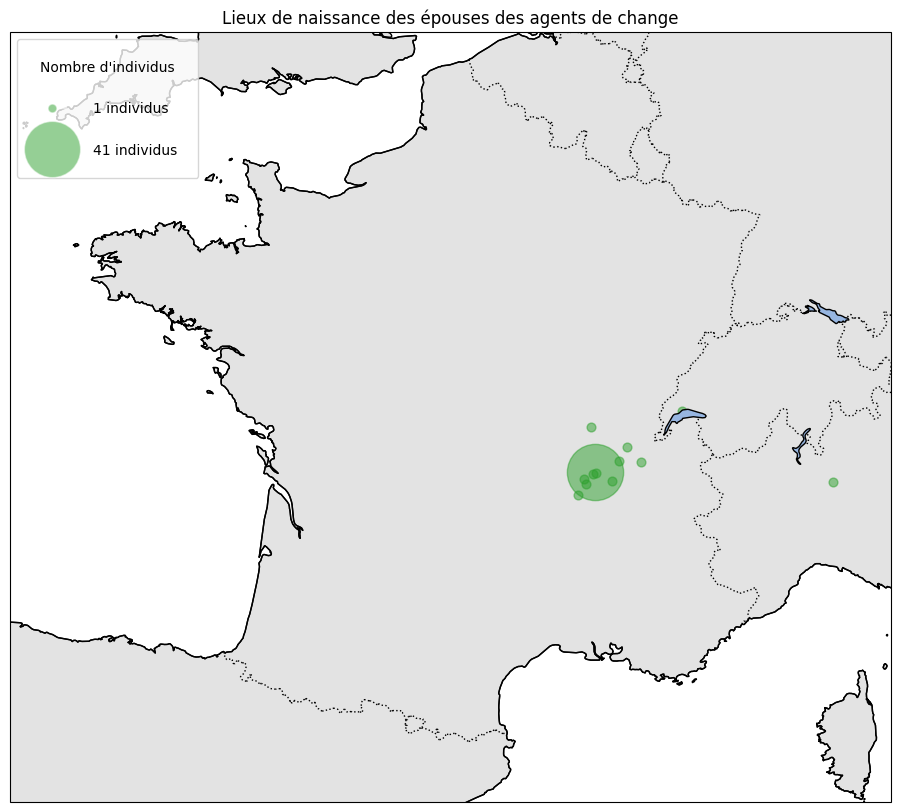

In [4]:
land_color = "#e3e3e3"
point_color = "tab:green"

# Redéfinir la projection
projection = ccrs.LambertConformal(central_longitude=2.5, central_latitude=46.5, standard_parallels=(44, 49))

# Redéfinir la taille des points pour la légende
legend_sizes = [1, aggregated_df['counts'].max()]
legend_labels = [f"{size} individus" for size in legend_sizes]
legend_handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=point_color, alpha=0.5,
                             markersize=((size*40)**0.5)) for size in legend_sizes]

# Recréer la carte avec la légende ajustée
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})
ax.set_extent([-5.3, 9.7, 41.3, 51.2])

# Ajoutez les caractéristiques géographiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor=land_color)
ax.add_feature(cfeature.LAKES, edgecolor='black')

# Placer les points sur la carte avec une taille proportionnelle au nombre de personnes
for index, row in aggregated_df.iterrows():
    ax.scatter(row["longitude"], row["latitude"], s=row["counts"]*40, color=point_color, alpha=0.5, transform=ccrs.PlateCarree())

# Ajouter la légende ajustée
ax.legend(handles=legend_handles, labels=legend_labels, title="Nombre d'individus", loc="upper left", borderpad=1.5, labelspacing=2, handletextpad=2)

plt.title("Lieux de naissance des épouses des agents de change")
plt.show()
